In [ ]:
pip install roboflow -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.9/86.9 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 88.8 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
from roboflow import Roboflow

In [ ]:
rf = Roboflow(api_key=userdata.get('Roboflow'))

# Download the dataset
project = rf.workspace("belajar-m4asd").project("crack-segmentation-79xfh")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Crack-Segmentation-1 in yolov8:: 100%|██████████| 8066/8066 [00:01<00:00, 4900.53it/s]


# Count

In [ ]:
def count_files_in_folder(folder_path):

    if not os.path.exists(folder_path):
        print(f"Folder '{folder_path}' does not exist.")
        return 0

    files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]
    return len(files)

In [ ]:
import os
folder = '/content/Crack-Segmentation-1/train/images'
num_files = count_files_in_folder(folder)
print(f"Number of files in '{folder}': {num_files}")

Number of files in '/content/Crack-Segmentation-1/train/images': 3716


In [ ]:
folder = '/content/Crack-Segmentation-1/train/labels'
num_files = count_files_in_folder(folder)
print(f"Number of files in '{folder}': {num_files}")

Number of files in '/content/Crack-Segmentation-1/train/labels': 3716


In [ ]:
import shutil

In [ ]:
source_images = '/content/Crack-Segmentation-1/test/images'
source_labels = '/content/Crack-Segmentation-1/test/labels'
target_images = '/content/Crack-Segmentation-1/train/images'
target_labels = '/content/Crack-Segmentation-1/train/labels'

In [ ]:
# Move all images from test/images to valid/images
for filename in os.listdir(source_images):
    src_img = os.path.join(source_images, filename)
    dst_img = os.path.join(target_images, filename)
    shutil.move(src_img, dst_img)

In [ ]:
# Move all labels from test/labels to valid/labels
for filename in os.listdir(source_labels):
    src_lbl = os.path.join(source_labels, filename)
    dst_lbl = os.path.join(target_labels, filename)
    shutil.move(src_lbl, dst_lbl)

In [ ]:
# remove the empty test directory
shutil.rmtree('/content/Crack-Segmentation-1/test')

# --------------------------------------------

In [ ]:
folder = '/content/Crack-Segmentation-1/train/images'
num_files = count_files_in_folder(folder)
print(f"Number of files in '{folder}': {num_files}")

Number of files in '/content/Crack-Segmentation-1/train/images': 3828


In [ ]:
folder = '/content/Crack-Segmentation-1/train/labels'
num_files = count_files_in_folder(folder)
print(f"Number of files in '{folder}': {num_files}")

Number of files in '/content/Crack-Segmentation-1/train/labels': 3828


In [ ]:
yaml_content = """
path: /content/Crack-Segmentation-1
train: /content/Crack-Segmentation-1/train/images
val: /content/Crack-Segmentation-1/valid/images

nc: 1

names:
    0: crack

"""

with open('/content/Crack-Segmentation-1/data.yaml', 'w') as f:
    f.write(yaml_content)

# prepare Yolo Model

In [ ]:
pip install ultralytics --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 56.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 39.5 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
model = YOLO('yolo11m-seg.pt')

100%|██████████| 43.3M/43.3M [00:00<00:00, 88.4MB/s]


In [ ]:
results = model.train(
    data="/content/Crack-Segmentation-1/data.yaml",
    epochs=60,
    imgsz=640,
    batch=16,
    project='runs/train',
    name='crack_run1',
    cache=True,
    exist_ok=True,
    patience=3
)

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=True, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Crack-Segmentation-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=60, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=crack_run1, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=3, perspective=0.0, plots=True, pose=

100%|██████████| 755k/755k [00:00<00:00, 20.1MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    111872  ultralytics.nn.modules.block.C3k2            [128, 256, 1, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  1    444928  ultralytics.nn.modules.block.C3k2            [256, 512, 1, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  1   1380352  ultralytics.nn.modules.block.C3k2            [512, 512, 1, True]           
  7                  -1  1   2360320  ultralytics

  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  1    990976  ultralytics.nn.modules.block.C2PSA           [512, 512, 1]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  1   1642496  ultralytics.nn.modules.block.C3k2            [1024, 512, 1, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  1    542720  ultralytics.nn.modules.block.C3k2            [1024, 256, 1, True]          
 17                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256,

100%|██████████| 5.35M/5.35M [00:00<00:00, 110MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 28.5±10.7 MB/s, size: 58.8 KB)


train: Scanning /content/Crack-Segmentation-1/train/labels... 3828 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3828/3828 [00:06<00:00, 582.29it/s]


train: New cache created: /content/Crack-Segmentation-1/train/labels.cache
WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


train: Caching images (4.4GB RAM): 100%|██████████| 3828/3828 [00:12<00:00, 313.90it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 23.5±13.4 MB/s, size: 69.6 KB)


val: Scanning /content/Crack-Segmentation-1/valid/labels... 199 images, 0 backgrounds, 0 corrupt: 100%|██████████| 199/199 [00:00<00:00, 470.14it/s]

val: New cache created: /content/Crack-Segmentation-1/valid/labels.cache


WARNING ⚠️ cache='ram' may produce non-deterministic training results. Consider cache='disk' as a deterministic alternative if your disk space allows.


val: Caching images (0.2GB RAM): 100%|██████████| 199/199 [00:01<00:00, 191.37it/s]


Plotting labels to runs/train/crack_run1/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 115 weight(decay=0.0), 126 weight(decay=0.0005), 125 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/crack_run1
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/60       9.4G      1.512      1.981      1.645      1.414         10        640: 100%|██████████| 240/240 [03:13<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        199        249      0.084      0.345     0.0602      0.017      0.052      0.269     0.0244      0.005



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/60      9.63G      1.637      1.822      1.608      1.471         11        640: 100%|██████████| 240/240 [03:08<00:00,  1.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]


                   all        199        249      0.157      0.551      0.126     0.0433      0.115      0.438     0.0675     0.0143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/60      9.65G      1.483      1.789      1.481      1.385         10        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        199        249      0.194      0.337      0.114     0.0375      0.151      0.262     0.0669     0.0141

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/60      9.63G      1.384      1.726      1.349      1.328         10        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]


                   all        199        249      0.413      0.494      0.328      0.118      0.261      0.355      0.155     0.0389

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/60      9.65G      1.287      1.713      1.264      1.279         13        640: 100%|██████████| 240/240 [03:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        199        249      0.487       0.59      0.418      0.196      0.393      0.518      0.287     0.0718

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/60      9.63G      1.228       1.65       1.19      1.241         10        640: 100%|██████████| 240/240 [03:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


                   all        199        249       0.66      0.667      0.613      0.318      0.553      0.558       0.44      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/60      9.68G      1.189       1.61      1.143      1.237         11        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        199        249      0.631      0.647      0.582      0.301      0.497      0.524      0.373      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/60       9.6G      1.149      1.624        1.1      1.211          8        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.66it/s]


                   all        199        249      0.601      0.702      0.572      0.306      0.486      0.578      0.394      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/60      9.66G      1.134      1.591      1.084      1.208         13        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.50it/s]


                   all        199        249      0.696      0.634      0.639      0.379       0.63      0.574      0.521       0.17

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/60      9.65G      1.098      1.583      1.053      1.182         11        640: 100%|██████████| 240/240 [03:06<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


                   all        199        249      0.734      0.687      0.693      0.374      0.611      0.574      0.478      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/60      9.65G      1.088      1.561       1.03      1.181         11        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


                   all        199        249      0.787      0.699      0.682      0.395      0.632      0.574      0.478      0.144

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/60      9.64G       1.07      1.592       1.01      1.169         12        640: 100%|██████████| 240/240 [03:07<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.60it/s]

                   all        199        249      0.767      0.703      0.711      0.446       0.65      0.594      0.509      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/60      9.67G       1.05      1.556     0.9909      1.162         10        640: 100%|██████████| 240/240 [03:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        199        249      0.712      0.645      0.686      0.415      0.691      0.522      0.498      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/60      9.69G      1.037      1.551     0.9725      1.154          6        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]

                   all        199        249      0.778      0.676      0.704      0.428      0.672      0.582      0.518      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/60      9.69G      1.022      1.538     0.9613      1.148         12        640: 100%|██████████| 240/240 [03:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]


                   all        199        249      0.761      0.703      0.707      0.437      0.658      0.643      0.548      0.175

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/60      9.65G      1.021      1.556     0.9506      1.149          8        640: 100%|██████████| 240/240 [03:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        199        249      0.819      0.695      0.729      0.481      0.703      0.618      0.596      0.186

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/60      9.63G      1.014       1.52     0.9498      1.148         12        640: 100%|██████████| 240/240 [03:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]

                   all        199        249      0.791      0.695      0.717      0.471      0.742       0.61      0.581      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/60      9.66G     0.9972      1.536     0.9225      1.136         11        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


                   all        199        249      0.814      0.691      0.756       0.48      0.709      0.618      0.614      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/60       9.6G     0.9886      1.516     0.9073      1.134         15        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.67it/s]

                   all        199        249      0.762      0.715      0.751      0.497      0.664      0.622      0.587      0.196



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/60      9.62G     0.9792      1.508     0.8985      1.127          9        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.57it/s]


                   all        199        249      0.802      0.666      0.714      0.493      0.688      0.574      0.541      0.187

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/60      9.66G     0.9827      1.523     0.8965      1.127         11        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.69it/s]


                   all        199        249      0.798      0.681      0.758      0.509      0.675      0.618      0.579      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/60      9.68G     0.9705      1.516     0.8844       1.12          7        640: 100%|██████████| 240/240 [03:06<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.68it/s]


                   all        199        249      0.788       0.67      0.741      0.508      0.735      0.602      0.612      0.198

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/60      9.71G     0.9638      1.515      0.888      1.124         11        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        199        249       0.81      0.691      0.756      0.525       0.76      0.622       0.63      0.209

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/60      9.66G     0.9518      1.497     0.8594      1.117         14        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        199        249      0.776      0.703      0.739      0.513      0.674       0.61      0.566      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/60      9.72G     0.9343        1.5     0.8437      1.108         10        640: 100%|██████████| 240/240 [03:06<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        199        249      0.839      0.709      0.759      0.524      0.737      0.614      0.576      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/60      9.68G     0.9313      1.508     0.8648      1.103         11        640: 100%|██████████| 240/240 [03:05<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]


                   all        199        249      0.871      0.678      0.758      0.529      0.761      0.582      0.583       0.19
EarlyStopping: Training stopped early as no improvement observed in last 3 epochs. Best results observed at epoch 23, best model saved as best.pt.
To update EarlyStopping(patience=3) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.

26 epochs completed in 1.482 hours.
Optimizer stripped from runs/train/crack_run1/weights/last.pt, 45.2MB
Optimizer stripped from runs/train/crack_run1/weights/best.pt, 45.2MB

Validating runs/train/crack_run1/weights/best.pt...
Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m-seg summary (fused): 138 layers, 22,336,083 parameters, 0 gradients, 123.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  14%|█▍        | 1/7 [00:00<00:04,  1.24it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  29%|██▊       | 2/7 [00:01<00:04,  1.01it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]


                   all        199        249      0.801      0.691      0.757      0.525      0.761      0.622       0.63      0.209
Speed: 0.3ms preprocess, 14.7ms inference, 0.0ms loss, 7.0ms postprocess per image
Results saved to runs/train/crack_run1


In [ ]:
model.export(format="onnx")

Ultralytics 8.3.170 🚀 Python-3.11.13 torch-2.6.0+cu124 CPU (Intel Xeon 2.00GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from '/content/runs/train/crack_run1/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 37, 8400), (1, 32, 160, 160)) (43.1 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 26.6s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.61...
ONNX: export success ✅ 37.2s, saved as '/content/runs/train/crack_run1/weights/best.onnx' (85.4 MB)

Export complete (40.2s)
Results saved to /content/runs/train/crack_run1/weights
Predict:         yolo predict task=segment model=/content/runs

'/content/runs/train/crack_run1/weights/best.onnx'

In [ ]:
pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 92.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.2 MB/s eta 0:00:00


In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
from ultralytics import YOLO


image 1/1 /content/images.jpeg: 640x640 1 crack, 50.2ms
Speed: 3.0ms preprocess, 50.2ms inference, 3.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict3
1 label saved to runs/segment/predict3/labels


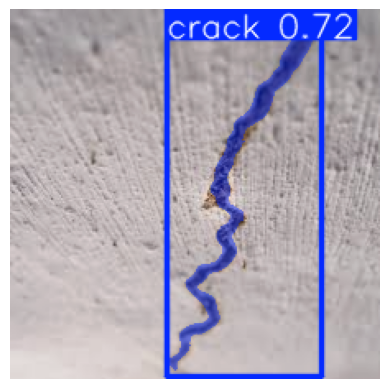

In [ ]:
model = YOLO('/content/runs/train/crack_run1/weights/best.pt')
image_path = '/content/images.jpeg'

results = model.predict(source=image_path, save=True, save_txt=True)

result_image = results[0].plot()
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /content/images (5).jpeg: 640x640 1 crack, 49.3ms
Speed: 2.7ms preprocess, 49.3ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/segment/predict4
1 label saved to runs/segment/predict4/labels


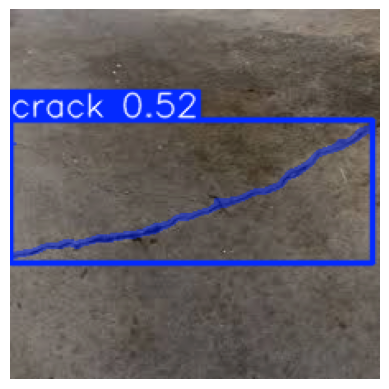

In [ ]:
model = YOLO('/content/runs/train/crack_run1/weights/best.pt')
image_path = '/content/images (5).jpeg'

results = model.predict(source=image_path, save=True, save_txt=True)

result_image = results[0].plot()
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



image 1/1 /content/images (1).jpeg: 352x640 1 crack, 58.6ms
Speed: 1.6ms preprocess, 58.6ms inference, 2.3ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/segment/predict5
1 label saved to runs/segment/predict5/labels


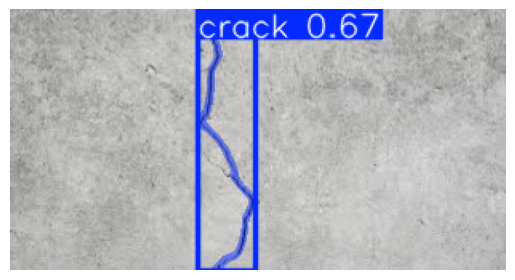

In [ ]:
model = YOLO('/content/runs/train/crack_run1/weights/best.pt')
image_path = '/content/images (1).jpeg'

results = model.predict(source=image_path, save=True, save_txt=True)

result_image = results[0].plot()
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /content/download (2).jpeg: 384x640 1 crack, 52.2ms
Speed: 1.7ms preprocess, 52.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict6
1 label saved to runs/segment/predict6/labels


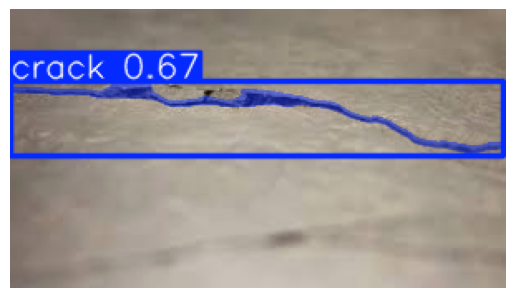

In [ ]:
model = YOLO('/content/runs/train/crack_run1/weights/best.pt')
image_path = '/content/download (2).jpeg'

results = model.predict(source=image_path, save=True, save_txt=True)

result_image = results[0].plot()
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /content/download (3).jpeg: 384x640 2 cracks, 33.4ms
Speed: 1.7ms preprocess, 33.4ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict7
1 label saved to runs/segment/predict7/labels


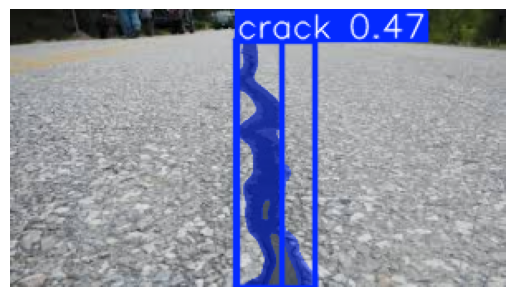

In [ ]:
model = YOLO('/content/runs/train/crack_run1/weights/best.pt')
image_path = '/content/download (3).jpeg'

results = model.predict(source=image_path, save=True, save_txt=True)

result_image = results[0].plot()
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /content/images (2).jpeg: 480x640 1 crack, 56.1ms
Speed: 2.0ms preprocess, 56.1ms inference, 2.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/predict8
1 label saved to runs/segment/predict8/labels


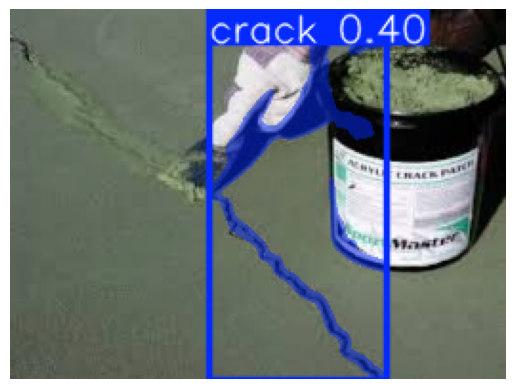

In [ ]:
model = YOLO('/content/runs/train/crack_run1/weights/best.pt')
image_path = '/content/images (2).jpeg'

results = model.predict(source=image_path, save=True, save_txt=True)

result_image = results[0].plot()
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /content/images (3).jpeg: 448x640 1 crack, 54.3ms
Speed: 1.8ms preprocess, 54.3ms inference, 2.4ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/segment/predict9
1 label saved to runs/segment/predict9/labels


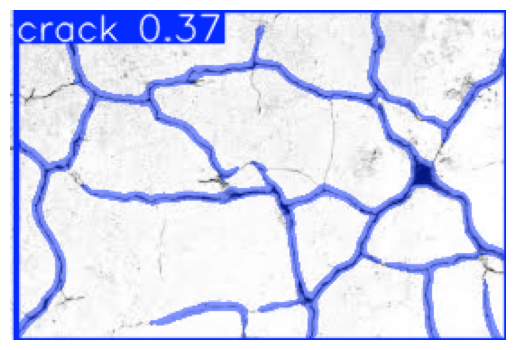

In [ ]:
model = YOLO('/content/runs/train/crack_run1/weights/best.pt')
image_path = '/content/images (3).jpeg'

results = model.predict(source=image_path, save=True, save_txt=True)

result_image = results[0].plot()
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /content/download (2).jpeg: 384x640 2 cracks, 55.3ms
Speed: 4.4ms preprocess, 55.3ms inference, 17.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/segment/predict17
1 label saved to runs/segment/predict17/labels


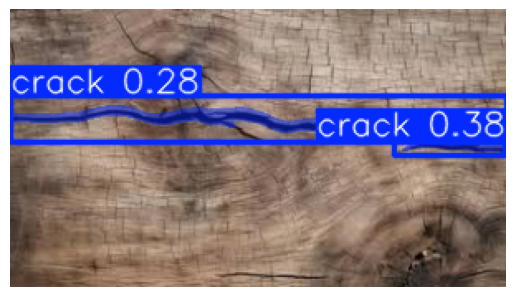

In [ ]:
model = YOLO('/content/runs/train/crack_run1/weights/best.pt')
image_path = '/content/download (2).jpeg'

results = model.predict(source=image_path, save=True, save_txt=True)

result_image = results[0].plot()
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


image 1/1 /content/images.jpeg: 640x480 1 crack, 52.7ms
Speed: 1.9ms preprocess, 52.7ms inference, 2.5ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/segment/predict15
1 label saved to runs/segment/predict15/labels


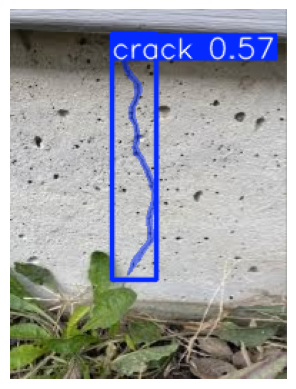

In [ ]:
model = YOLO('/content/runs/train/crack_run1/weights/best.pt')
image_path = '/content/images.jpeg'

results = model.predict(source=image_path, save=True, save_txt=True)

result_image = results[0].plot()
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()